In [1]:
import os
from glob import glob
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

def load_data(dataset_path):
    train_x = sorted(glob(os.path.join(dataset_path, "ISIC2016_Task1_Training_Input", "*.jpg")))
    train_y = sorted(glob(os.path.join(dataset_path, "ISIC2016_Task1_Training_GroundTruth", "*.png")))
    return (train_x, train_y)
dataset_path = "isic-challenge-2016/"
(filelist_trainx_ph2, filelist_trainy_ph2) = load_data(dataset_path)

In [2]:
X_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainx_ph2])
Y_train_ph2 = np.array([np.array(Image.open(fname)) for fname in filelist_trainy_ph2])

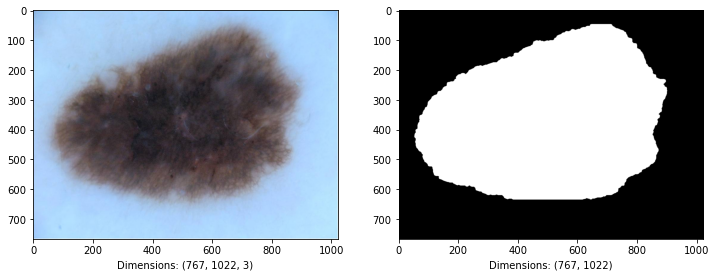

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(X_train_ph2[0])
plt.xlabel("Dimensions: "+str(np.array(X_train_ph2[0]).shape))
plt.subplot(1,2,2)
plt.imshow(Y_train_ph2[0], plt.cm.binary_r)
plt.xlabel("Dimensions: "+str(np.array(Y_train_ph2[0]).shape))
plt.show()

In [4]:
def random_rotation(x_image, y_image):
    rows_x,cols_x, chl_x = x_image.shape
    rows_y,cols_y = y_image.shape
    rand_num = np.random.randint(-35,35)
    M1 = cv2.getRotationMatrix2D((cols_x/2,rows_x/2),rand_num,1)
    M2 = cv2.getRotationMatrix2D((cols_y/2,rows_y/2),rand_num,1)
    x_image = cv2.warpAffine(x_image,M1,(cols_x,rows_x))
    y_image = cv2.warpAffine(y_image.astype('float32'),M2,(cols_y,rows_y))
    return np.array(x_image), np.array(y_image.astype('int'))

def horizontal_flip(x_image, y_image):
    x_image = cv2.flip(x_image, 1)
    y_image = cv2.flip(y_image.astype('float32'), 1)
    return x_image, y_image.astype('int')

def img_augmentation(x_train, y_train):
    x_rotat = []
    y_rotat = []
    x_flip = []
    y_flip = []
    for idx in range(len(x_train)):
        x,y = random_rotation(x_train[idx], y_train[idx])
        x_rotat.append(x)
        y_rotat.append(y)
        
        x,y = horizontal_flip(x_train[idx], y_train[idx])
        x_flip.append(x)
        y_flip.append(y)
        
    return np.array(x_rotat), np.array(y_rotat), np.array(x_flip), np.array(y_flip)

In [5]:
x_rotated, y_rotated, x_flipped, y_flipped = img_augmentation(X_train_ph2, Y_train_ph2)

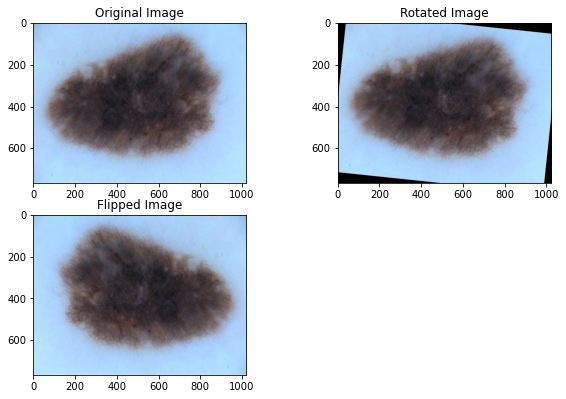

In [6]:
img_num = 0
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(X_train_ph2[img_num])
plt.title('Original Image')
plt.subplot(3,2,2)
plt.imshow(x_rotated[img_num])
plt.title('Rotated Image')
plt.subplot(3,2,3)
plt.imshow(x_flipped[img_num])
plt.title('Flipped Image')
plt.show()

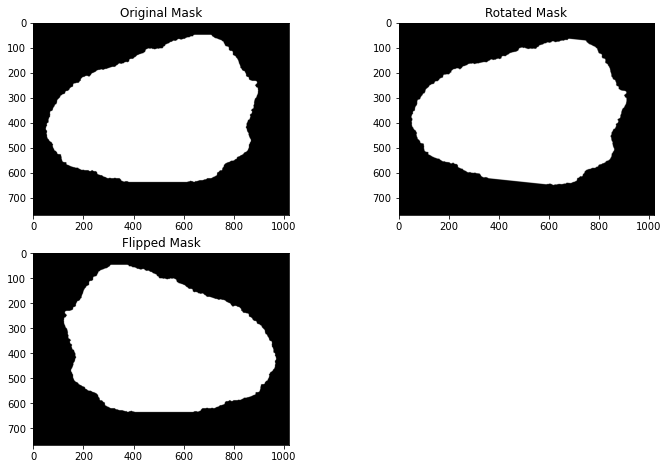

In [7]:
img_num = 0
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
plt.imshow(Y_train_ph2[img_num], plt.cm.binary_r)
plt.title('Original Mask')
plt.subplot(3,2,2)
plt.imshow(y_rotated[img_num], plt.cm.binary_r)
plt.title('Rotated Mask')
plt.subplot(3,2,3)
plt.imshow(y_flipped[img_num], plt.cm.binary_r)
plt.title('Flipped Mask')
plt.show()

In [8]:
X_train_ph2 = np.concatenate([X_train_ph2, x_rotated, x_flipped])
Y_train_ph2 = np.concatenate([Y_train_ph2, y_rotated, y_flipped])

In [10]:
for img_num in range(X_train_ph2.shape[0]):
    name = str(img_num) + '.jpg'
    save_image_path = f"data1/{name}"
    cv2.imwrite(save_image_path, cv2.cvtColor(X_train_ph2[img_num], cv2.COLOR_RGB2BGR))

In [ ]:
for img_num in range(Y_train_ph2.shape[0]):
    name = str(img_num) + '.png'
    save_image_path = f"data2/{name}"
    cv2.imwrite(save_image_path, Y_train_ph2[img_num])